STEPS for k-means clustering:

1. Specify the number of clusters you want (usually referred to as k).
2. Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
3. Determine which data points belong to which cluster by finding the closest centroid to each data point.
4. Update the centroids based on the geometric mean of all the data points in the cluster.
5. Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.

In [3]:
import numpy as np
import pandas as pd

In [ ]:
players = pd.read_csv("players_22.csv")

In [5]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
#Define the list of features to be used
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [7]:
#Drop any column that has a null or missing values
players = players.dropna(subset=features)

In [8]:
#Create the DataFrame
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [9]:
#Scale the data to ensure that all data points are within the same range
#Min-max scaling
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [10]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [12]:
#Initialize random centroids. Another option is to find a completely random values within the range of the data points

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        #selects a random sample on each column
        centroid = data.apply(lambda x: float(x.sample().iloc[0])) 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    

In [13]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,4.717391,2.760870,5.108696,4.326087,6.282609
potential,8.043478,5.108696,5.500000,4.326087,3.347826
wage_eur,1.064378,1.141631,1.399142,1.000000,1.115880
value_eur,1.110928,1.301143,1.011181,1.034378,1.021620
age,5.666667,4.666667,2.666667,4.333333,3.333333


In [14]:
#LABEL EACH DATA
#Find the distances between each data point to each centroids. Select the smallest distance.

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [16]:
labels.value_counts()

3    8251
2    7657
0    1829
1    1428
Name: count, dtype: int64

UPDATE CENTROIDS basesd on the datapoints on each cluster by finding the geometric mean of each cluster

GEOMETRIC MEAN

1. Mathematical definition: The n-th root of the product of n numbers.
2. Practical definition: The average of the logarithmic values of a data set, converted back to a base 10 number. 

The first step in calculating the Geometric Mean using this method is to determine the logarithm of each data point using your calculator. Next, add all of the data point logarithms together and divide this sum by the number of data points (n).
In other words, take the average of the logs. Next, convert this log average back to a base 10 number using the antilogarithm function key on the calculator.

In [34]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [18]:
new_centroids(data, labels, 5)

,overall,potential,wage_eur,value_eur,age
0,6.843959,6.570827,1.805269,1.489942,5.724360
1,2.142374,3.944480,1.015647,1.009445,2.503242
2,4.561764,6.069216,1.170628,1.120589,2.747053
3,4.494685,4.446794,1.087864,1.038718,4.883442


In [19]:
#Visualize the data in 2D by converting the features down to 2(data consist of  features which is difficult to visualize)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#clear Jupyter notebook output each time graph is plotted
from IPython.display import clear_output

In [25]:
def plot_clusters(data, labels, centroids, iteration):
    #initialize PCA model with 2 components
    pca = PCA(n_components=2)
    
    #fit the data in to the model and transform to 2 dimensions.
    data_2d = pca.fit_transform(data)

    #Tranform centroids to be along X
    centroids_2d = pca.transform(centroids.T)

    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

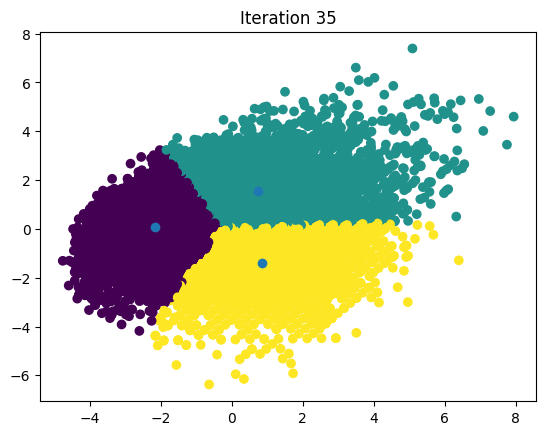

In [42]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [43]:
centroids

,0,1,2
overall,3.206838,5.806043,4.784633
potential,4.928473,6.497993,4.506962
wage_eur,1.028505,1.420001,1.118904
value_eur,1.026614,1.285501,1.044980
age,2.518708,3.596161,5.472247


In [45]:
from sklearn.cluster import KMeans

In [ ]:
#Initialize KMEANS model
kmeans = KMeans(3)

#Fit the data with the model
kmeans.fit(data)

In [52]:
sklearn_centroids = kmeans.cluster_centers_
sklearn_centroids

array([[6.2163381 , 6.62137456, 1.651548  , 1.41134037, 4.11518288],
       [3.58397813, 5.19732875, 1.03928415, 1.03524388, 2.70693454],
       [4.80880402, 4.51346381, 1.11413599, 1.04044798, 5.60629406]])

In [53]:
pd.DataFrame(sklearn_centroids, columns=features).T

,0,1,2
overall,6.216338,3.583978,4.808804
potential,6.621375,5.197329,4.513464
wage_eur,1.651548,1.039284,1.114136
value_eur,1.411340,1.035244,1.040448
age,4.115183,2.706935,5.606294
